### Registration ID : GO_STP_9654

Predicting a Startups Profit/Success Rate using Multiple Linear Regression in Python
Here 50 startups dataset containing 5 columns  like “R&D Spend”, “Administration”, “Marketing Spend”, “State”, “Profit”.

In this dataset first 3 columns provides you spending on Research , Administration and Marketing respectively. State indicates startup based on that state. Profit indicates how much profits earned by a startup.

Clearly, we can understand that it is a multiple linear regression problem, as the independent variables are more than one.

Prepare a prediction model for profit of 50_Startups data in Python

In [32]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [33]:
# read dataset
df = pd.read_csv("50_Startups.csv")
print(type(df))
print(df)

<class 'pandas.core.frame.DataFrame'>
    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     F

In [34]:
# hence here one of the feature 'state' is in string data type thats why we have to convert it's to integer value but 
# it's nominal data hence use dummy variables or one hot encoding

state = pd.get_dummies(df['State'])
state

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


In [35]:
# concate original and dummies dataframe according to columns
df = pd.concat([df,state], axis='columns')
df

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0
5,131876.90,99814.71,362861.36,New York,156991.12,0,0,1
6,134615.46,147198.87,127716.82,California,156122.51,1,0,0
7,130298.13,145530.06,323876.68,Florida,155752.60,0,1,0
8,120542.52,148718.95,311613.29,New York,152211.77,0,0,1
9,123334.88,108679.17,304981.62,California,149759.96,1,0,0


In [36]:
# drop state column bcz it's having string data type
df = df.drop(['State'], axis='columns')
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [37]:
# Dummy Variable trap (Dummy Variables are multicollinear)

df = df.drop(['New York'], axis='columns')
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida
0,165349.20,136897.80,471784.10,192261.83,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1


In [38]:
# display all columns
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'California', 'Florida'],
      dtype='object')

In [39]:
# Divide dataset into x(features as i/p) and y(label as o/p)
# Linear Regression model takes x as 2-D numpy array format bcz features(i/p) can be multiple values for particular dataset
#  and y as 1-D numpy array format bcz label(o/p) can be only one unique value

x = df.iloc[:, [0,1,2,4,5]].values
y = df.iloc[:, 3].values

print(f"Dimesnsion of x is {x.ndim}\nDimesnsion of y is {y.ndim}")
print("Features(Hours) {}\n Label(Scores) {}".format(x,y))

Dimesnsion of x is 2
Dimesnsion of y is 1
Features(Hours) [[1.6534920e+05 1.3689780e+05 4.7178410e+05 0.0000000e+00 0.0000000e+00]
 [1.6259770e+05 1.5137759e+05 4.4389853e+05 1.0000000e+00 0.0000000e+00]
 [1.5344151e+05 1.0114555e+05 4.0793454e+05 0.0000000e+00 1.0000000e+00]
 [1.4437241e+05 1.1867185e+05 3.8319962e+05 0.0000000e+00 0.0000000e+00]
 [1.4210734e+05 9.1391770e+04 3.6616842e+05 0.0000000e+00 1.0000000e+00]
 [1.3187690e+05 9.9814710e+04 3.6286136e+05 0.0000000e+00 0.0000000e+00]
 [1.3461546e+05 1.4719887e+05 1.2771682e+05 1.0000000e+00 0.0000000e+00]
 [1.3029813e+05 1.4553006e+05 3.2387668e+05 0.0000000e+00 1.0000000e+00]
 [1.2054252e+05 1.4871895e+05 3.1161329e+05 0.0000000e+00 0.0000000e+00]
 [1.2333488e+05 1.0867917e+05 3.0498162e+05 1.0000000e+00 0.0000000e+00]
 [1.0191308e+05 1.1059411e+05 2.2916095e+05 0.0000000e+00 1.0000000e+00]
 [1.0067196e+05 9.1790610e+04 2.4974455e+05 1.0000000e+00 0.0000000e+00]
 [9.3863750e+04 1.2732038e+05 2.4983944e+05 0.0000000e+00 1.000000

In [40]:
# display all Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
 4   California       50 non-null     uint8  
 5   Florida          50 non-null     uint8  
dtypes: float64(4), uint8(2)
memory usage: 1.8 KB


In [41]:
# show no. of rows and columns
df.shape

(50, 6)

In [42]:
# Divide dataset(x,y) into testing data as xtest,ytest and training data as xtrain,ytrain
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [43]:
# Creating Multilinear model
from sklearn.linear_model import LinearRegression
model = LinearRegression()  # y=a1x1+a2x2+....amxn+b

In [44]:
# Train our model by providing training data
Mymodel = model.fit(xtrain,ytrain)
Mymodel

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
# Prediction by our model
y_pred = Mymodel.predict(xtest)

In [46]:
# Difference of y_pred(predicted data by our model) and ytest(actual data in dataset)
diff = pd.DataFrame(y_pred,ytest)
diff

,0
105008.31,114664.417159
96479.51,90593.155316
78239.91,75692.841516
81229.06,70221.886797
191050.39,179790.255149
182901.99,171576.920185
35673.41,49753.587520
101004.64,102276.658889
49490.75,58649.377958
97483.56,98272.025611


In [47]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida
0,165349.20,136897.80,471784.10,192261.83,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1


In [48]:
# predict scores for '4.3' hours
y_pred = Mymodel.predict([[162597.70, 136897.80, 471784.10, 0, 0]])
y_pred

array([188079.12258912])

In [49]:
# y = m1x1+m2x2+m3x3+c where c is intercept, m is coefficient, x is features(independent variable) and y is label(dependent variable)

In [50]:
m = Mymodel.coef_ # coefficient value calculated by our model 

mfinal = pd.DataFrame(m)
mfinal

,0
0,0.774342
1,-0.009444
2,0.028918
3,-272.794662
4,309.943983


In [51]:
c = Mymodel.intercept_  # intercept value calculated by our model
c

49822.501966190444

In [52]:
m1 = 0.774342    # coefficient value for R&D Spend
m2 = -0.009444   # coefficient value for Administration
m3 = 0.028918    # coefficient value for Marketing Spend
m4 = -272.794662 # coefficient value for California
m5 = 309.943983  # coefficient value for Florida

In [53]:
# To check above value is correct or incorrect we put first record value in below equation

In [54]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida
0,165349.20,136897.80,471784.10,192261.83,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1


In [55]:
x1 = 165349.20  # feature as R&D Spend
x2 = 136897.80  # feature as Administration
x3 = 471784.10  # feature as Marketing Spend
x4 = 0          # feature as California
x5 = 0          # feature as Florida

In [56]:
c = Mymodel.intercept_ # intercept value calculated by our model

In [57]:
y = m1*x1 + m2*x2 + m3*x3 + m4*x4 + m5*x5 + c
y

190209.52197319045

In [66]:
# coefficient of determination
from sklearn.metrics import r2_score, mean_squared_error
y_pred = Mymodel.predict(xtest)
vif = r2_score(ytest,y_pred)
y_pred = Mymodel.predict(xtest)  # prdicted values
a = r2_score(ytest,y_pred)  # accuracy
msr = mean_squared_error(ytest,y_pred)  #  mean_squared_error

In [67]:
print("coefficient(m):",mfinal)
print("Intercept(c):",c)
print("Accuracy(a):",a)
print("Mean Squared Error(msr):",msr)
print("variance Inflation Factor(VIF):",vif)

coefficient(m):             0
0    0.774342
1   -0.009444
2    0.028918
3 -272.794662
4  309.943983
Intercept(c): 49822.501966190444
Accuracy(a): 0.9649618042060317
Mean Squared Error(msr): 79495441.50414422
variance Inflation Factor(VIF): 0.9649618042060317


In [68]:
# Prediction by our model
y_pred_train = Mymodel.predict(xtrain)
y_pred_test = Mymodel.predict(xtest)

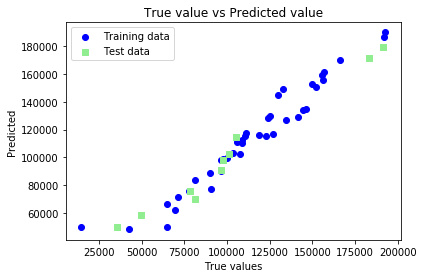

In [69]:
# visualize line by scatter plot
plt.scatter(ytrain ,y_pred_train,c='blue',marker='o',label='Training data')

plt.scatter(ytest,y_pred_test ,c='lightgreen',marker='s',label='Test data')

plt.xlabel('True values')

plt.ylabel('Predicted')

plt.title("True value vs Predicted value")

plt.legend(loc= 'upper left')

#plt.hlines(y=0,xmin=0,xmax=50)

plt.plot()

plt.show()